Create function called detect_face that take input a path of the image with faces and return same image with rectangles around the faces we find  
take in output that you need show the next info :  
1- OpenCV Version you use  
2- Original image in BGR  
3- How many faces your function can find  
4- output results with rectangles around face  
5- try it on the next images : "ai-faces-1.jpg" , "cartoon_faces.jpg" ,"meeting.jpg"  

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def display(img,cmap = None):
    #Displays an image using Matplotlib.
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)
    plt.show()

# Show images

In [28]:
images= ["ai-faces-1.jpg" , "cartoon_faces.jpg" ,"meeting.jpg"  ]

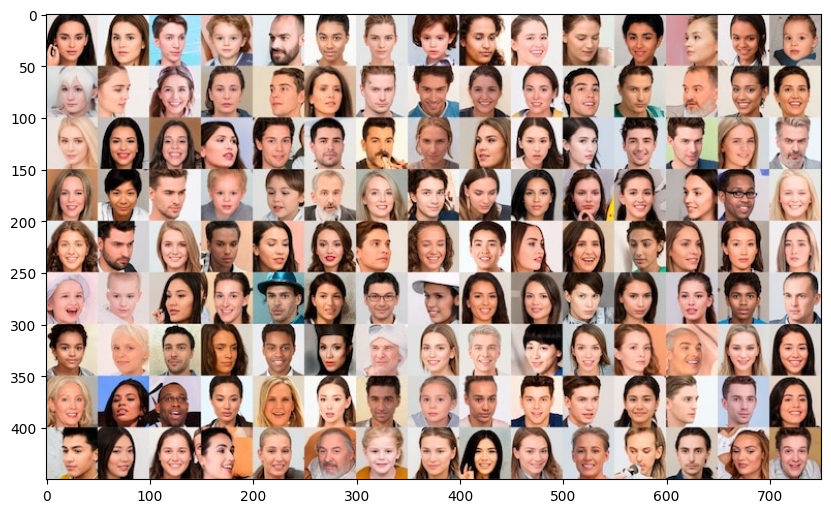

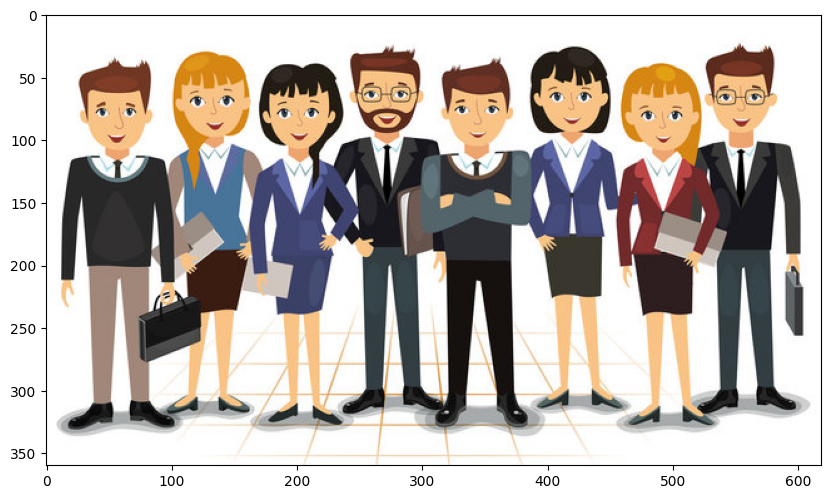

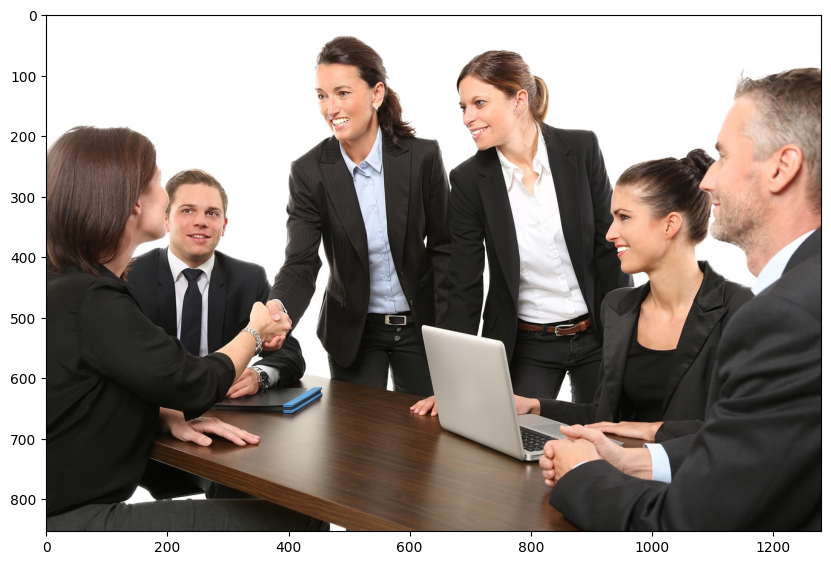

In [29]:
for image in images:
    try:
        image_to_show = cv2.imread(image)#BGR
        image_to_show_RGB= cv2.cvtColor(image_to_show, cv2.COLOR_BGR2RGB)
        display(image_to_show_RGB)
    except Exception as e:
        print(f'Check images: {e}')


Training is done
First, OpenCV Version: 4.12.0
********************

--- Processing ai-faces-1.jpg ---
Original image BGR:


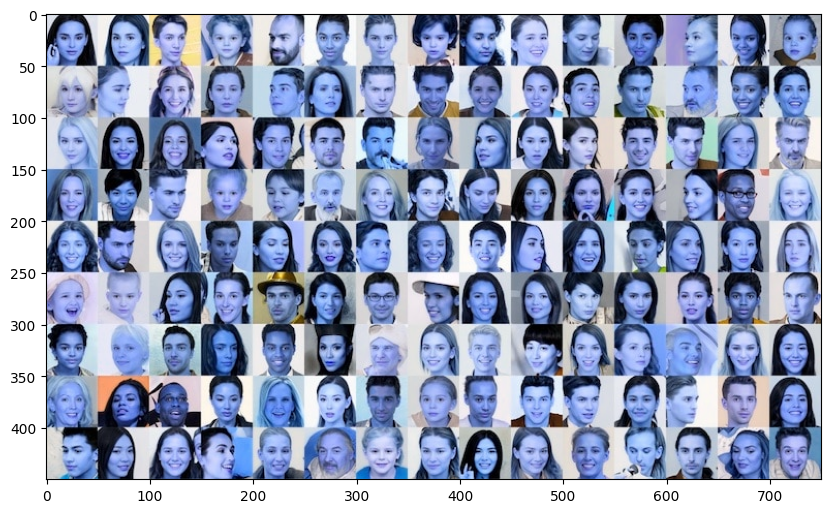

********************
Faces found: 128
********************
Original image in RBG colors with detected Faces:


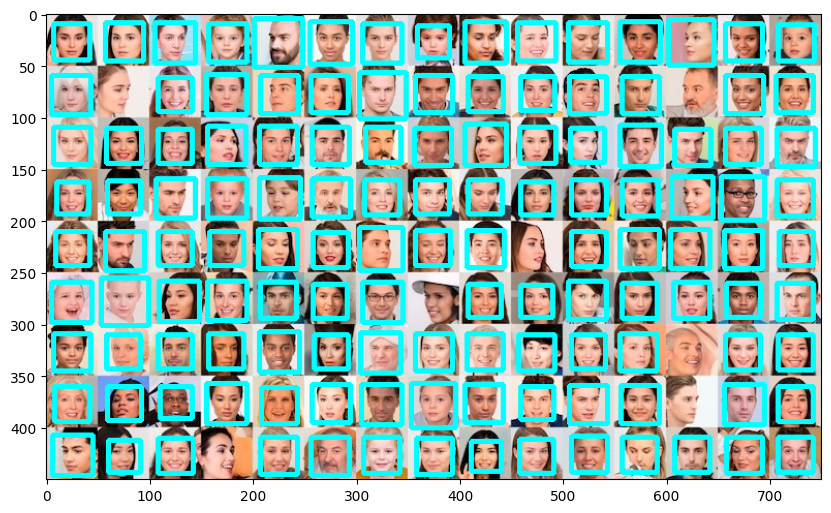

Image procressing is finished
********************

--- Processing cartoon_faces.jpg ---
Original image BGR:


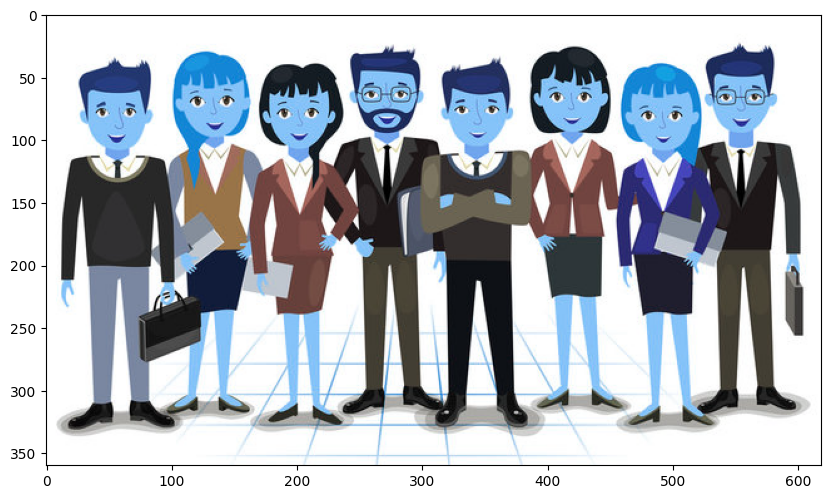

********************
Faces found: 5
********************
Original image in RBG colors with detected Faces:


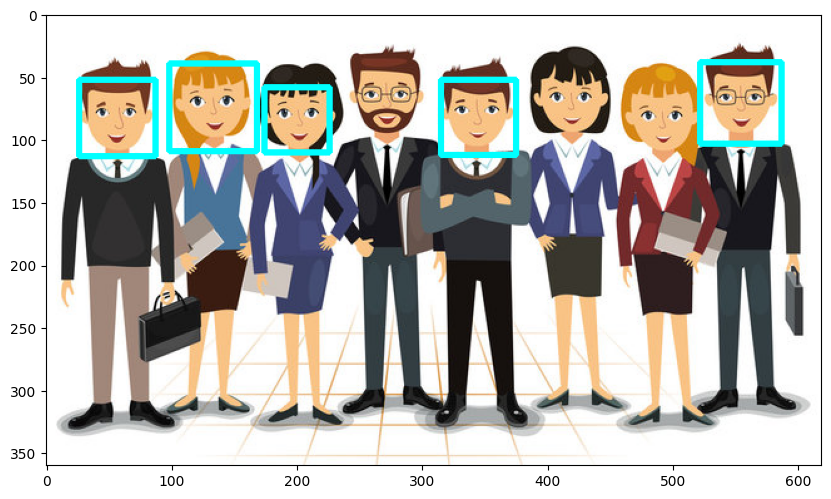

Image procressing is finished
********************

--- Processing meeting.jpg ---
Original image BGR:


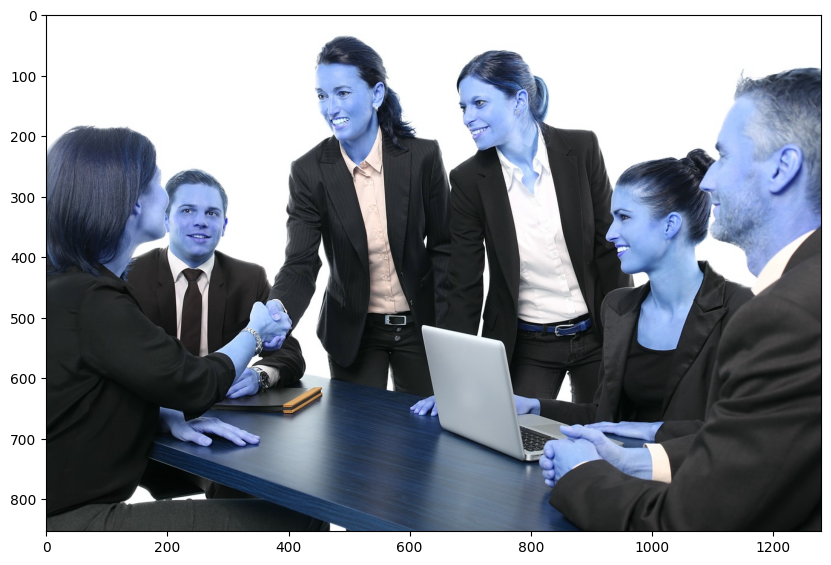

********************
Faces found: 7
********************
Original image in RBG colors with detected Faces:


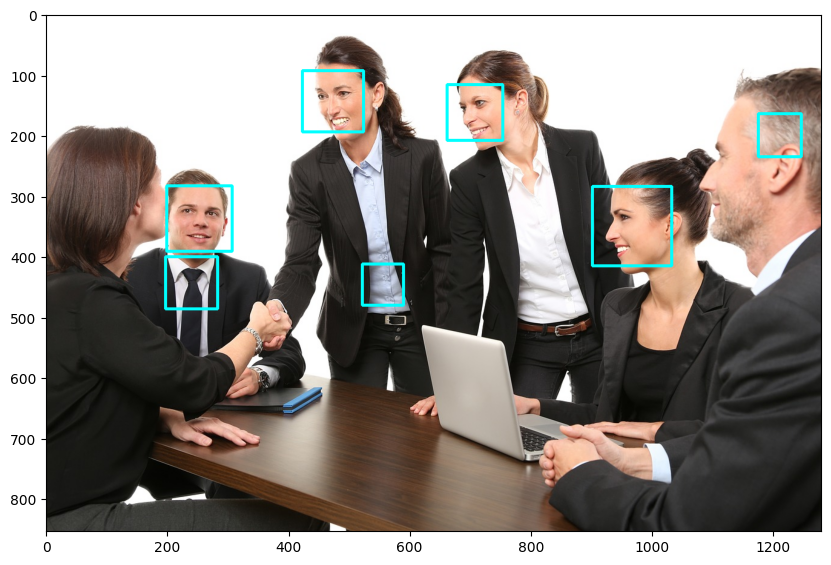

Image procressing is finished
********************

Execution is finished


In [34]:
# Create instance of this CascadeClassifier class 
# and attached the ready trained model in it in form of XML
#employs a series of simple, efficient classifiers (called a cascade) to rapidly identify objects (like faces) in an image.
#initializing a specialized tool for object detection.
#pre-trained detection models. This is the specific file containing the pre-trained model for detecting frontal human faces.


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 
# Check if the model loaded successfully
if face_cascade.empty():
    print("ERROR: Cascade Classifier failed to load the XML file.")
    exit()
else:
    print('Training is done')


def detecting_faces(img) -> image:
    # read image in BGR, detects faces, draw boxes around faces and return image in numpy.ndarray format
    
    img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img_gray)
    # Let's prepare our rectangles to use cv2.rectangle() and draw them over our image
    rect_color = (255,255,0)
    rect_thickness = 3 #pix
    for (x,y,width,height) in faces :
        cv2.rectangle(img,# src img
                    (x,y),#top_left coordinations
                    (x+width,y+height), #bottom_right coordination
                    color = rect_color,
                    thickness = rect_thickness)
    return img, len(faces)


print(f"First, OpenCV Version: {cv2.__version__}")
print(f"*"*20)
for image in images:
    try:
        print(f"\n--- Processing {image} ---")
        image_BGR_origional= cv2.imread(image)
        image_BGR= image_BGR_origional.copy()
        image_BGR= detecting_faces(image_BGR)
        print(f"Original image BGR:")
        display(image_BGR_origional)
        print(f"*"*20)
        print(f"Faces found: {image_BGR[1]}")
        print(f"*"*20)
        image_RGB= cv2.cvtColor(image_BGR[0], cv2.COLOR_BGR2RGB)
        print(f"Original image in RBG colors with detected Faces:")
        display(image_RGB)
        print(f"Image procressing is finished")
        print(f"*"*20)
    except Exception as e:
        print(f'Check images: {e}')
print(f"\nExecution is finished")